In [71]:
should_stem = False
# should_stem = True

# should_remove_stopwords = False
should_remove_stopwords = True

In [72]:
import sys
# sys.path.insert(1, '/persistent/Sefaria-Project/ML/scripts/classes.py')
sys.path.insert(1, '/persistent/Sefaria-Project/ML/scripts/')

In [73]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 350


In [74]:
from tqdm import tqdm
from datetime import datetime
from sklearn.metrics import accuracy_score
# from classes import DataManager, PipelineFactory, my_example_topics
my_example_topics = [
    'prayer', 
    'procedures-for-judges-and-conduct-towards-them', 'learning', 'kings', 'hilchot-chol-hamoed', 'laws-of-judges-and-courts', 'laws-of-animal-sacrifices', 'financial-ramifications-of-marriage', 'idolatry', 'laws-of-transferring-between-domains']

my_example_topics

['prayer',
 'procedures-for-judges-and-conduct-towards-them',
 'learning',
 'kings',
 'hilchot-chol-hamoed',
 'laws-of-judges-and-courts',
 'laws-of-animal-sacrifices',
 'financial-ramifications-of-marriage',
 'idolatry',
 'laws-of-transferring-between-domains']

In [77]:
start_time = datetime.now()
import csv
NUM_TOPICS = 40
NUM_DATA_POINTS = 1000
pd.options.display.max_colwidth = 100

In [78]:
df = pd.read_csv('/persistent/Sefaria-Project/ML/data/yishai_data.csv',
                 quoting=2, error_bad_lines=False
                )[:NUM_DATA_POINTS]
print('Original:',df.shape)
df = df.drop_duplicates()
print('Without duplicates:',df.shape)
df = df.dropna()
print('Without nulls:',df.shape)
df.head()

Original: (1000, 5)
Without duplicates: (1000, 5)
Without nulls: (667, 5)


,Ref,En,He,Topics,Expanded Topics
0,Avodah Zarah 52b:13,"The Gemara answers: The two cases are not comparable. <b>There,</b> the coins of Jerusalem <b>ha...",התם לא אשתמשו בהו לגבוה הכא כיון דאשתמש בהו לגבוה לאו אורח ארעא לאשתמושי בהו הדיוטא:,derekh-eretz laws-of-building-the-temple-and-its-furnishings,continuant laws laws-of-building-the-temple-and-its-furnishings halachic-process acts laws-of-th...
1,Tractate Kallah Rabbati 1:23,If one has intercourse by the light of a lamp he will have epileptic children.<br><small>GEMARA<...,(<big><strong>ברייתא</strong></big>) המשמש מטתו לאור הנר הוויין לו בנים נכפים: <big><strong>[גמ׳...,sexual-intercourse,acts occurent entity sexual-intercourse
2,Temurah 7b:12,<strong>MISHNA:</strong> <b>The priests substitute for their</b> own offerings <b>and Israelites...,<big><strong>מתני׳</strong></big> הכהנים ממירין בשלהן וישראל ממירין בשלהן אין הכהנים ממירין לא ב...,substitutions-of-sacrifices laws-of-substitution-of-offerings,continuant substitutions-of-sacrifices laws halachic-process acts laws-of-substitution-of-offeri...
4,Rosh Hashanah 25a:8,<b>Rabbi Yoḥanan said: What is the reason</b> for the opinion <b>of the house of Rabbi</b> Yehud...,"א""ר יוחנן מ""ט דבי רבי דכתיב (תהלים קד, יט) עשה ירח למועדים שמש ידע מבואו שמש הוא דידע מבואו ירח ...",months calculations-to-verify-the-sighting-of-the-new-moon-in-its-time,material-entity group-of-inanimate-objects entity independent-continuant months luminaries one-d...
7,Ketubot 12b:6,<strong>GEMARA:</strong> <b>It was stated:</b> With regard to one who approaches another and say...,<big><strong>גמ׳</strong></big> אתמר מנה לי בידך והלה אומר איני יודע רב יהודה ורב הונא אמרי חייב...,laws-of-litigant-oaths safek,continuant laws laws-of-litigant-oaths quality safek property-law specifically-dependent-continu...


In [79]:
df = df.set_index('Ref',
                   drop=True
                  )
df.head()

,En,He,Topics,Expanded Topics
Ref,,,,
Avodah Zarah 52b:13,"The Gemara answers: The two cases are not comparable. <b>There,</b> the coins of Jerusalem <b>ha...",התם לא אשתמשו בהו לגבוה הכא כיון דאשתמש בהו לגבוה לאו אורח ארעא לאשתמושי בהו הדיוטא:,derekh-eretz laws-of-building-the-temple-and-its-furnishings,continuant laws laws-of-building-the-temple-and-its-furnishings halachic-process acts laws-of-th...
Tractate Kallah Rabbati 1:23,If one has intercourse by the light of a lamp he will have epileptic children.<br><small>GEMARA<...,(<big><strong>ברייתא</strong></big>) המשמש מטתו לאור הנר הוויין לו בנים נכפים: <big><strong>[גמ׳...,sexual-intercourse,acts occurent entity sexual-intercourse
Temurah 7b:12,<strong>MISHNA:</strong> <b>The priests substitute for their</b> own offerings <b>and Israelites...,<big><strong>מתני׳</strong></big> הכהנים ממירין בשלהן וישראל ממירין בשלהן אין הכהנים ממירין לא ב...,substitutions-of-sacrifices laws-of-substitution-of-offerings,continuant substitutions-of-sacrifices laws halachic-process acts laws-of-substitution-of-offeri...
Rosh Hashanah 25a:8,<b>Rabbi Yoḥanan said: What is the reason</b> for the opinion <b>of the house of Rabbi</b> Yehud...,"א""ר יוחנן מ""ט דבי רבי דכתיב (תהלים קד, יט) עשה ירח למועדים שמש ידע מבואו שמש הוא דידע מבואו ירח ...",months calculations-to-verify-the-sighting-of-the-new-moon-in-its-time,material-entity group-of-inanimate-objects entity independent-continuant months luminaries one-d...
Ketubot 12b:6,<strong>GEMARA:</strong> <b>It was stated:</b> With regard to one who approaches another and say...,<big><strong>גמ׳</strong></big> אתמר מנה לי בידך והלה אומר איני יודע רב יהודה ורב הונא אמרי חייב...,laws-of-litigant-oaths safek,continuant laws laws-of-litigant-oaths quality safek property-law specifically-dependent-continu...


In [80]:
df.loc['Rosh Hashanah 25a:8']

En                 <b>Rabbi Yoḥanan said: What is the reason</b> for the opinion <b>of the house of Rabbi</b> Yehud...
He                 א"ר יוחנן מ"ט דבי רבי דכתיב (תהלים קד, יט) עשה ירח למועדים שמש ידע מבואו שמש הוא דידע מבואו ירח ...
Topics                                          months calculations-to-verify-the-sighting-of-the-new-moon-in-its-time
Expanded Topics    material-entity group-of-inanimate-objects entity independent-continuant months luminaries one-d...
Name: Rosh Hashanah 25a:8, dtype: object

In [81]:
df['En'].sample(5)

Ref
Pesachim 61b:10      <b>And if you say: What is the stringency of sprinkling</b> such that part of the group being un...
Zevachim 81b:14      <strong>MISHNA:</strong> Blood <b>that is</b> to be <b>placed</b> on three locations <b>inside</...
Pirkei Avot 5:6      Ten things were created on the eve of the Sabbath at twilight, and these are they: [1] the mouth...
Bava Batra 126a:2    § With regard to the <i>halakha</i> that the firstborn is not entitled to a double portion of th...
Zevachim 20a:17      The Gemara <b>raises an objection</b> from a mishna (<i>Tamid</i> 28b) that describes the daily ...
Name: En, dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, Avodah Zarah 52b:13 to Sefer HaChinukh 456:1
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   En               667 non-null    object
 1   He               667 non-null    object
 2   Topics           667 non-null    object
 3   Expanded Topics  667 non-null    object
dtypes: object(4)
memory usage: 46.1+ KB


In [83]:
df = df[[
#     'Ref',
         'En','Topics']]
df.head()

,En,Topics
Ref,,
Avodah Zarah 52b:13,"The Gemara answers: The two cases are not comparable. <b>There,</b> the coins of Jerusalem <b>ha...",derekh-eretz laws-of-building-the-temple-and-its-furnishings
Tractate Kallah Rabbati 1:23,If one has intercourse by the light of a lamp he will have epileptic children.<br><small>GEMARA<...,sexual-intercourse
Temurah 7b:12,<strong>MISHNA:</strong> <b>The priests substitute for their</b> own offerings <b>and Israelites...,substitutions-of-sacrifices laws-of-substitution-of-offerings
Rosh Hashanah 25a:8,<b>Rabbi Yoḥanan said: What is the reason</b> for the opinion <b>of the house of Rabbi</b> Yehud...,months calculations-to-verify-the-sighting-of-the-new-moon-in-its-time
Ketubot 12b:6,<strong>GEMARA:</strong> <b>It was stated:</b> With regard to one who approaches another and say...,laws-of-litigant-oaths safek


In [84]:
df = df.rename(columns={
#     'Ref': 'Ref', 
                        'En': 'passage_text'})

In [85]:
def select_topics(all_topics):
    all_topics_list = all_topics.split()
    sublist = [topic for topic in all_topics_list if topic in my_example_topics]
    result = ' '.join(sublist)
    return result

In [86]:
df1 = df

In [87]:
df1['Topics'] = df1['Topics'].apply(select_topics)
df1.sample(20)

,passage_text,Topics
Ref,,
Bava Batra 108b:3,<b>And what</b> is the <b>derivation? As it is taught</b> in a <i>baraita</i> concerning the ver...,
Meilah 9a:4,Shmuel’s father <b>raises the objection and he resolves it</b> himself. The <i>tanna</i> of that...,
"Shulchan Arukh, Yoreh De'ah 290:1",<b>To not write [a mezuzah] on the parchment from a sefer torah.</b><br>A sefer torah or tefilin...,
Genesis 22:4,"On the third day Abraham lifted up his eyes, and saw the place afar off.",
Or HaChaim on Genesis 37:17:4,The question we must all ask is that if the angel remained deliberately so vague that Joseph did...,
Sefer HaChinukh 456:1,<b>To not listen to one who prophecies in the name of idolatry:</b> That we not listen [to] the ...,
Bava Metzia 20b:6,"The Gemara infers: <b>Conclude from it</b> that if one lost an item that has a knot, the type of...",
"Shulchan Arukh, Even HaEzer 129:7","אִם כָּתַב: פְּלוֹנִי הֶחָכָם, אוֹ הָרַב, אוֹ הַנָּשִׂיא, אַף עַל פִּי שֶׁאֵין קוֹרִין אוֹתוֹ כּ...",
Sanhedrin 20b:13,The <i>baraita</i> continues: <b>And still I do not know whether building them the Chosen House ...,kings


In [88]:
df = pd.concat([df, df.pop('Topics').str.get_dummies(sep=' ')], axis=1)
df.head(3)

,passage_text,financial-ramifications-of-marriage,hilchot-chol-hamoed,idolatry,kings,laws-of-animal-sacrifices,laws-of-judges-and-courts,laws-of-transferring-between-domains,learning,prayer,procedures-for-judges-and-conduct-towards-them
Ref,,,,,,,,,,,
Avodah Zarah 52b:13,"The Gemara answers: The two cases are not comparable. <b>There,</b> the coins of Jerusalem <b>ha...",0,0,0,0,0,0,0,0,0,0
Tractate Kallah Rabbati 1:23,If one has intercourse by the light of a lamp he will have epileptic children.<br><small>GEMARA<...,0,0,0,0,0,0,0,0,0,0
Temurah 7b:12,<strong>MISHNA:</strong> <b>The priests substitute for their</b> own offerings <b>and Israelites...,0,0,0,0,0,0,0,0,0,0


In [89]:
data_raw = df
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

passage_text                                      0
financial-ramifications-of-marriage               0
hilchot-chol-hamoed                               0
idolatry                                          0
kings                                             0
laws-of-animal-sacrifices                         0
laws-of-judges-and-courts                         0
laws-of-transferring-between-domains              0
learning                                          0
prayer                                            0
procedures-for-judges-and-conduct-towards-them    0
dtype: int64


In [90]:
# passages with no label are considered to be topicless passages.
# Creating seperate column in dataframe to identify topicless passages.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
topicless_passages_count = (rowSums==0).sum(axis=0)

print("Total number of passages = ",len(data_raw))
print("Number of topicless passages = ",topicless_passages_count)
print("Number of passages with labels =",(len(data_raw)-topicless_passages_count))

Total number of passages =  667
Number of topicless passages =  604
Number of passages with labels = 63


In [91]:
columns_wanted = [
#     'Ref',
                  'passage_text'] + my_example_topics
columns_wanted

['passage_text',
 'prayer',
 'procedures-for-judges-and-conduct-towards-them',
 'learning',
 'kings',
 'hilchot-chol-hamoed',
 'laws-of-judges-and-courts',
 'laws-of-animal-sacrifices',
 'financial-ramifications-of-marriage',
 'idolatry',
 'laws-of-transferring-between-domains']

In [92]:
data_raw = data_raw[columns_wanted]
data_raw.shape

(667, 11)

In [93]:
df_all_rows = data_raw

In [94]:
# show True for nonzero
(df_all_rows[my_example_topics] != 0).loc[['Menachot 5a:6']]

,prayer,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
Ref,,,,,,,,,,
Menachot 5a:6,False,False,False,False,False,False,True,False,False,False


In [95]:
# show True if row contains a nonzero
(~(df_all_rows[my_example_topics] == 0).all(axis=1).loc[['Menachot 5a:6']])

Ref
Menachot 5a:6    True
dtype: bool

In [96]:
# keep only rows which don't have all zeroes
df_wanted_rows = data_raw[~(df_all_rows[my_example_topics] == 0).all(axis=1)]
df_wanted_rows.head()

,passage_text,prayer,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
Ref,,,,,,,,,,,
Menachot 5a:6,"<b>Rav Adda, son of Rav Yitzḥak, raises an objection</b> to Rav Adda bar Ahava’s explanation fro...",0,0,0,0,0,0,1,0,0,0
Gittin 37b:5,§ <b>Rav Yehuda says</b> that <b>Rav Naḥman says: A person is deemed credible to say: I had a <i...,0,1,0,0,0,0,0,0,0,0
Horayot 13a:10,"<b>A Torah scholar precedes the king of Israel,</b> because in the case of <b>a Sage who dies, w...",0,0,0,1,0,0,0,0,0,0
Sotah 41a:16,<b>The synagogue attendant takes a Torah scroll and gives it to the head of the synagogue</b> th...,0,0,0,1,0,0,0,0,0,0
Rashi on Numbers 15:22:1,"וכי תשגו ולא תעשו AND IF YE HAVE ERRED, AND NOT DONE [ALL THESE COMMANDMENTS WHICH THE LORD HATH...",0,0,0,0,0,0,0,0,1,0


In [97]:
df_wanted_rows.shape

(66, 11)

In [98]:
df = df_wanted_rows
df.head()

,passage_text,prayer,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
Ref,,,,,,,,,,,
Menachot 5a:6,"<b>Rav Adda, son of Rav Yitzḥak, raises an objection</b> to Rav Adda bar Ahava’s explanation fro...",0,0,0,0,0,0,1,0,0,0
Gittin 37b:5,§ <b>Rav Yehuda says</b> that <b>Rav Naḥman says: A person is deemed credible to say: I had a <i...,0,1,0,0,0,0,0,0,0,0
Horayot 13a:10,"<b>A Torah scholar precedes the king of Israel,</b> because in the case of <b>a Sage who dies, w...",0,0,0,1,0,0,0,0,0,0
Sotah 41a:16,<b>The synagogue attendant takes a Torah scroll and gives it to the head of the synagogue</b> th...,0,0,0,1,0,0,0,0,0,0
Rashi on Numbers 15:22:1,"וכי תשגו ולא תעשו AND IF YE HAVE ERRED, AND NOT DONE [ALL THESE COMMANDMENTS WHICH THE LORD HATH...",0,0,0,0,0,0,0,0,1,0


In [99]:
categories = list(df.columns.values)
categories = categories[2:]
print(categories)

['procedures-for-judges-and-conduct-towards-them', 'learning', 'kings', 'hilchot-chol-hamoed', 'laws-of-judges-and-courts', 'laws-of-animal-sacrifices', 'financial-ramifications-of-marriage', 'idolatry', 'laws-of-transferring-between-domains']


In [100]:

# Calculating number of passages in each category

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of passages'])
df_stats

,category,number of passages
0,procedures-for-judges-and-conduct-towards-them,13
1,learning,2
2,kings,8
3,hilchot-chol-hamoed,5
4,laws-of-judges-and-courts,14
5,laws-of-animal-sacrifices,7
6,financial-ramifications-of-marriage,3
7,idolatry,8
8,laws-of-transferring-between-domains,7


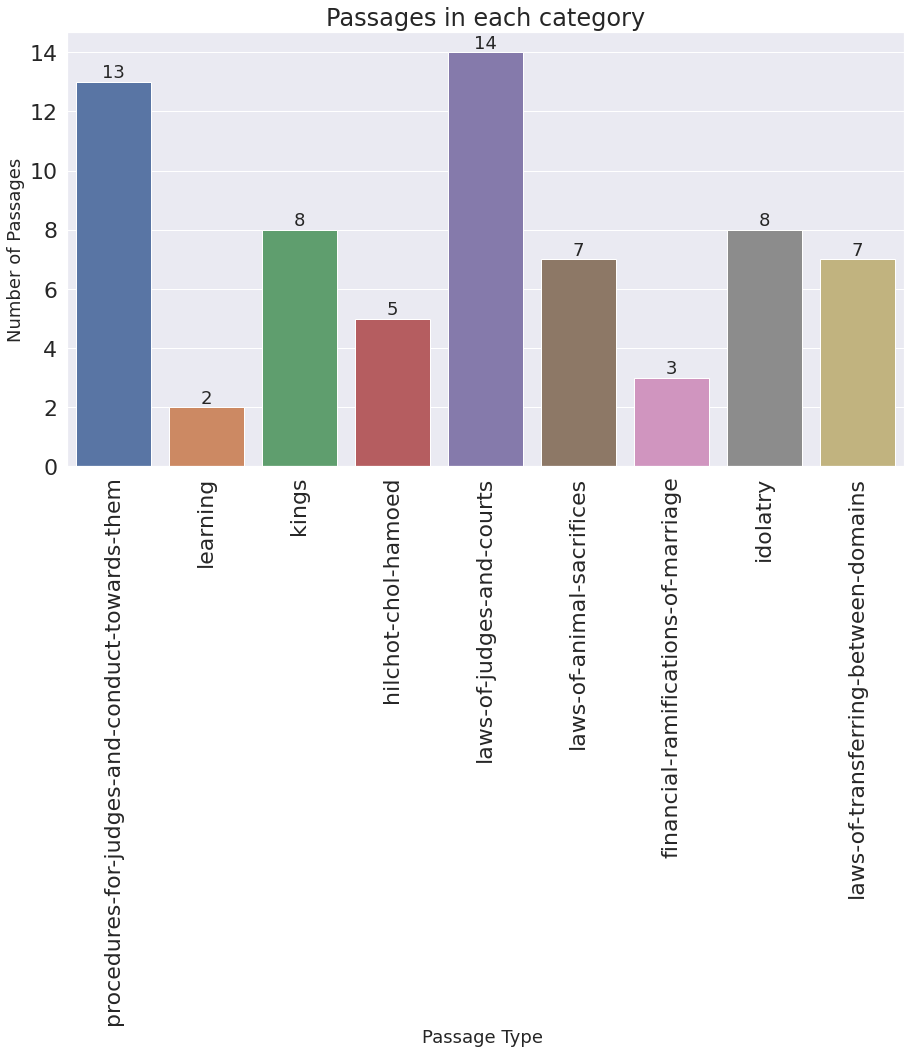

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, df.iloc[:,2:].sum().values)

plt.title("Passages in each category", fontsize=24)
plt.ylabel('Number of Passages', fontsize=18)
plt.xlabel('Passage Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0, label, ha='center', va='bottom', fontsize=18)

plt.xticks(rotation=90)
plt.show()

In [102]:
rowSums = df.iloc[:,2:].sum(axis=1)
rowSums

Ref
Menachot 5a:6               1
Gittin 37b:5                1
Horayot 13a:10              1
Sotah 41a:16                1
Rashi on Numbers 15:22:1    1
                           ..
Bava Kamma 28a:4            2
Ezekiel 8:15                1
Deuteronomy 7:25            1
Bava Kamma 84b:2            1
Sanhedrin 17b:7             1
Length: 66, dtype: int64

In [103]:
multiLabel_counts = rowSums.value_counts()
multiLabel_counts

1    57
2     5
0     4
dtype: int64

In [108]:
multiLabel_counts.sort_index(inplace=True)
multiLabel_counts

0     4
1    57
2     5
dtype: int64

In [109]:
multiLabel_counts = multiLabel_counts.iloc[:]

In [110]:
# mu

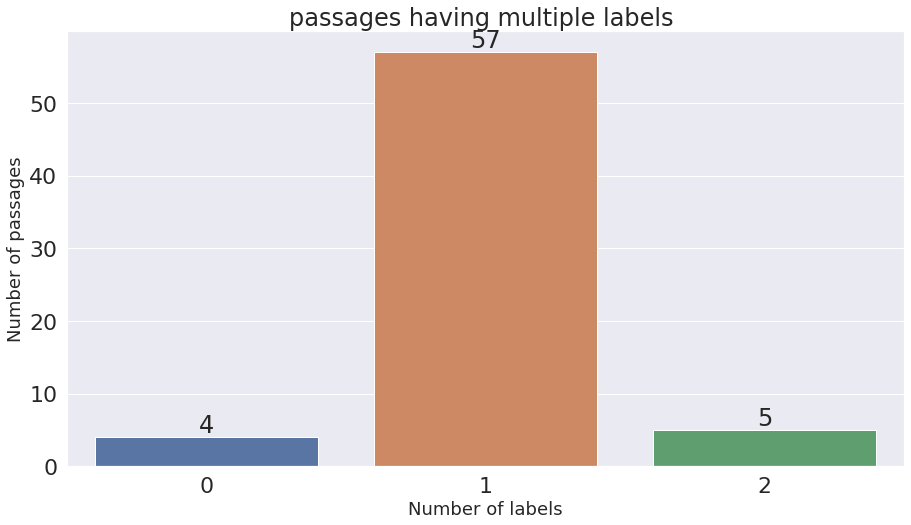

In [111]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("passages having multiple labels ")
plt.ylabel('Number of passages', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0, label, ha='center', va='bottom')

plt.show()

In [112]:
df.head()

,passage_text,prayer,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
Ref,,,,,,,,,,,
Menachot 5a:6,"<b>Rav Adda, son of Rav Yitzḥak, raises an objection</b> to Rav Adda bar Ahava’s explanation fro...",0,0,0,0,0,0,1,0,0,0
Gittin 37b:5,§ <b>Rav Yehuda says</b> that <b>Rav Naḥman says: A person is deemed credible to say: I had a <i...,0,1,0,0,0,0,0,0,0,0
Horayot 13a:10,"<b>A Torah scholar precedes the king of Israel,</b> because in the case of <b>a Sage who dies, w...",0,0,0,1,0,0,0,0,0,0
Sotah 41a:16,<b>The synagogue attendant takes a Torah scroll and gives it to the head of the synagogue</b> th...,0,0,0,1,0,0,0,0,0,0
Rashi on Numbers 15:22:1,"וכי תשגו ולא תעשו AND IF YE HAVE ERRED, AND NOT DONE [ALL THESE COMMANDMENTS WHICH THE LORD HATH...",0,0,0,0,0,0,0,0,1,0


In [113]:
df.shape

(66, 11)

In [114]:
df.loc[['Bava Kamma 28a:4']]

,passage_text,prayer,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
Ref,,,,,,,,,,,
Bava Kamma 28a:4,The Gemara suggests: <b>Come</b> and <b>hear</b> an alternative proof for Rav Naḥman’s opinion. ...,0,1,0,0,0,1,0,0,0,0


In [115]:

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [116]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

from unidecode import unidecode

def keepAlpha(sentence):
    sentence = unidecode(sentence)
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [117]:
test_string = 'Rabbi Yoḥanan'
test_string_result = keepAlpha(test_string)
test_string_result

'Rabbi Yohanan'

In [118]:
data = df
data['passage_text'] = data['passage_text'].str.lower()
data['passage_text'] = data['passage_text'].apply(cleanHtml)
data['passage_text'] = data['passage_text'].apply(cleanPunc)
data['passage_text'] = data['passage_text'].apply(keepAlpha)
# data.loc[['Bava Kamma 28a:4']]
data.head()

,passage_text,prayer,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
Ref,,,,,,,,,,,
Menachot 5a:6,rav adda son of rav yitzhak raises an objection to rav adda bar ahava s explanation from a barai...,0,0,0,0,0,0,1,0,0,0
Gittin 37b:5,SS rav yehuda says that rav nahman says a person is deemed credible to say i had a prosbol and...,0,1,0,0,0,0,0,0,0,0
Horayot 13a:10,a torah scholar precedes the king of israel because in the case of a sage who dies we have no on...,0,0,0,1,0,0,0,0,0,0
Sotah 41a:16,the synagogue attendant takes a torah scroll and gives it to the head of the synagogue that stan...,0,0,0,1,0,0,0,0,0,0
Rashi on Numbers 15:22:1,vky tSHgv vlA t SHv and if ye have erred and not done all these commandments which the lord hat...,0,0,0,0,0,0,0,0,1,0


In [119]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [120]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

if should_remove_stopwords:
    data['passage_text'] = data['passage_text'].apply(removeStopWords)
data.head()

,passage_text,prayer,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
Ref,,,,,,,,,,,
Menachot 5a:6,rav adda son rav yitzhak raises objection rav adda bar ahava explanation baraita hala...,0,0,0,0,0,0,1,0,0,0
Gittin 37b:5,SS rav yehuda says rav nahman says person deemed credible say prosbol lost collect ...,0,1,0,0,0,0,0,0,0,0
Horayot 13a:10,torah scholar precedes king israel case sage dies like case king israel die...,0,0,0,1,0,0,0,0,0,0
Sotah 41a:16,synagogue attendant takes torah scroll gives head synagogue stands temple mount hea...,0,0,0,1,0,0,0,0,0,0
Rashi on Numbers 15:22:1,vky tSHgv vlA SHv ye erred done commandments lord hath spoken unto moses idolatry ...,0,0,0,0,0,0,0,0,1,0


In [121]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

if should_stem:
    data['passage_text'] = data['passage_text'].apply(stemming)
data.head()

,passage_text,prayer,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
Ref,,,,,,,,,,,
Menachot 5a:6,rav adda son rav yitzhak raises objection rav adda bar ahava explanation baraita hala...,0,0,0,0,0,0,1,0,0,0
Gittin 37b:5,SS rav yehuda says rav nahman says person deemed credible say prosbol lost collect ...,0,1,0,0,0,0,0,0,0,0
Horayot 13a:10,torah scholar precedes king israel case sage dies like case king israel die...,0,0,0,1,0,0,0,0,0,0
Sotah 41a:16,synagogue attendant takes torah scroll gives head synagogue stands temple mount hea...,0,0,0,1,0,0,0,0,0,0
Rashi on Numbers 15:22:1,vky tSHgv vlA SHv ye erred done commandments lord hath spoken unto moses idolatry ...,0,0,0,0,0,0,0,0,1,0


In [122]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, 
#                                shuffle=True
                              )

print(train.shape)
print(test.shape)

(46, 11)
(20, 11)


In [123]:
train_text = train['passage_text']
test_text = test['passage_text']

In [124]:
# print(type(test_text))
test_text.head()

Ref
Niddah 50a:6                           gemara answers  rabbi yohanan found another unattributed mishna  indicates  different conclusio...
Ezekiel 8:15                                         said  unto    hast thou seen   son  man thou shalt  see  greater abominations  these
Menachot 5a:6                         rav adda son  rav yitzhak raises  objection  rav adda bar ahava  explanation   baraita      hala...
Shabbat 98a:3                          gemara asks     much   length   wagon    cubits  much   width   beam    cubit   half  many beam...
Shulchan Arukh, Orach Chayim 545:6       write  loan contract   festival  either  lender   trust  borrower   borrower needs  money   s...
Name: passage_text, dtype: object

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
# vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [126]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = [
#     'Ref',
                               'passage_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = [
#     'true_topics',
    'passage_text'], axis=1)

In [127]:
y_test.head()

,prayer,procedures-for-judges-and-conduct-towards-them,learning,kings,hilchot-chol-hamoed,laws-of-judges-and-courts,laws-of-animal-sacrifices,financial-ramifications-of-marriage,idolatry,laws-of-transferring-between-domains
Ref,,,,,,,,,,
Niddah 50a:6,0,1,0,0,0,1,0,0,0,0
Ezekiel 8:15,0,0,0,0,0,0,0,0,1,0
Menachot 5a:6,0,0,0,0,0,0,1,0,0,0
Shabbat 98a:3,0,0,0,0,0,0,0,0,0,1
"Shulchan Arukh, Orach Chayim 545:6",0,0,0,0,1,0,0,0,0,0


In [128]:
print(type(x_test))
x_test

<class 'scipy.sparse.csr.csr_matrix'>


<20x8477 sparse matrix of type '<class 'numpy.float64'>'
	with 386 stored elements in Compressed Sparse Row format>

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [130]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd('**bold**')

**bold**

In [131]:
labels = {}
# labels[passage_id] = {
#     'text':'in the beginning God createed...',
#     'data_subset':'training',
#     'true_labels':['creation', 'universe'], 
#     'pred_labels':['prayer','korbanos']
# }

# misclassifications['exile']['redemption'] = [
#     list of passages that are truly 
#     labeled as exile, but were 
#     misclassfied as redemption
#     ]

In [132]:
train_size = train.shape[0]
train_size

46

In [133]:
test_size = test.shape[0]
test_size

20

In [134]:
my_example_topics

['prayer',
 'procedures-for-judges-and-conduct-towards-them',
 'learning',
 'kings',
 'hilchot-chol-hamoed',
 'laws-of-judges-and-courts',
 'laws-of-animal-sacrifices',
 'financial-ramifications-of-marriage',
 'idolatry',
 'laws-of-transferring-between-domains']

In [135]:
# data
# df_wanted_rows = data_raw[~(df_all_rows[my_example_topics] == 0).all(axis=1)]
def get_true_topics(row):
    true_topics = []
    for col in my_example_topics:
        if row[col]==1:
            true_topics.append(col)
    return true_topics
test['true_topics'] = test.apply(get_true_topics,axis=1)
test[['passage_text',
     'true_topics'
    ]].head()
# print(type(test))
# test.columns

,passage_text,true_topics
Ref,,
Niddah 50a:6,gemara answers rabbi yohanan found another unattributed mishna indicates different conclusio...,"[procedures-for-judges-and-conduct-towards-them, laws-of-judges-and-courts]"
Ezekiel 8:15,said unto hast thou seen son man thou shalt see greater abominations these,[idolatry]
Menachot 5a:6,rav adda son rav yitzhak raises objection rav adda bar ahava explanation baraita hala...,[laws-of-animal-sacrifices]
Shabbat 98a:3,gemara asks much length wagon cubits much width beam cubit half many beam...,[laws-of-transferring-between-domains]
"Shulchan Arukh, Orach Chayim 545:6",write loan contract festival either lender trust borrower borrower needs money s...,[hilchot-chol-hamoed]


In [136]:
train.shape

(46, 11)

In [137]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict"
test_predictions = classifier.predict(x_test)
train_predictions = classifier.predict(x_train)


# accuracy
print("Test Accuracy = ",accuracy_score(y_test,test_predictions))
print("Train Accuracy = ",accuracy_score(y_train,train_predictions))
print("\n")

Test Accuracy =  0.15
Train Accuracy =  1.0


CPU times: user 122 ms, sys: 1.58 ms, total: 124 ms
Wall time: 124 ms


In [138]:
# # test.true_topics.head()

# pred_df = pd.DataFrame(predictions).to_string()

# def get_pred_topics(row):
#     pred = predictions
#     return pred
# # test['pred_topics'] = test.apply(get_pred_topics,axis=1)

preds_list = list(test_predictions)

In [139]:
preds_col = [
    [my_example_topics[int(s)] for s in (str(item)[:-2]) if s.isdigit()]
     for item in preds_list]
len(preds_col)

20

In [140]:
test['pred_topics'] = preds_col
test[['pred_topics']].shape

# test.iloc[4].true_topics

(20, 1)

In [141]:
test[['passage_text','true_topics','pred_topics']].head()

,passage_text,true_topics,pred_topics
Ref,,,
Niddah 50a:6,gemara answers rabbi yohanan found another unattributed mishna indicates different conclusio...,"[procedures-for-judges-and-conduct-towards-them, laws-of-judges-and-courts]",[]
Ezekiel 8:15,said unto hast thou seen son man thou shalt see greater abominations these,[idolatry],"[prayer, kings]"
Menachot 5a:6,rav adda son rav yitzhak raises objection rav adda bar ahava explanation baraita hala...,[laws-of-animal-sacrifices],[]
Shabbat 98a:3,gemara asks much length wagon cubits much width beam cubit half many beam...,[laws-of-transferring-between-domains],[]
"Shulchan Arukh, Orach Chayim 545:6",write loan contract festival either lender trust borrower borrower needs money s...,[hilchot-chol-hamoed],"[prayer, hilchot-chol-hamoed]"


In [142]:
# pd.DataFrame(predictions)

In [143]:
type(y_test)

pandas.core.frame.DataFrame

In [144]:
y_test_array = y_test.values
y_train_array = y_train.values
# type(y_test_array)

In [145]:
# ('train'

In [146]:
import mlcm

for data_subset in ["train", 'test']:
    
    Y_test = None
    Y_pred = None

    if data_subset == 'train':
        Y_test = y_train_array
        Y_pred = train_predictions.toarray()

    if data_subset == 'test':
        Y_test = y_test_array
        Y_pred = test_predictions.toarray()


    # classes = ['prayer', 'procedures-for-judges-and-conduct-towards-them', 'learning', 'kings', 'hilchot-chol-hamoed', 'laws-of-judges-and-courts', 'laws-of-animal-sacrifices', 'financial-ramifications-of-marriage', 'idolatry', 'laws-of-transferring-between-domains']
    classes = [
    #     'Prayer', 
        'Judges', 'Learn', 'Kings', 'Moed', 'Court', 'Koban', 'Marriage $', 'Idols', 'Hotzaa']
    # classes = ['zero','one','two']

    Y_test = numpy.array(Y_test)
    print("Y_test.shape",Y_test.shape)

    Y_pred = numpy.array(Y_pred)
    print("Y_pred.shape",Y_pred.shape)

    fig, ax = plt.subplots(figsize=(20, 10)) 
    font = {'family' : 'bold',
            'weight' : 'bold',
            'size'   : 17}
    
    
    plt.rc('font', **font)

    cm = mlcm.confusion_matrix(Y_test, Y_pred)
    mlcm.plot_confusion_matrix(cm, classes, normalize=True)

    # cm = mlcm.draw_cm(y_test, y_pred, classes, normalize=True)

    plt.xticks(rotation=90)
    plt.title((data_subset+'ing set').upper())
    plt.show()

ModuleNotFoundError: No module named 'mlcm'

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import mplcursors
import json

y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
labels = ["ant", "bird", "cat"]
confusion_mat = confusion_matrix(y_true, y_pred, labels=labels)

heatmap = plt.imshow(confusion_mat, cmap="plasma", interpolation='nearest')

plt.colorbar(heatmap, ticks=range(3))

plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

cursor = mplcursors.cursor(heatmap, hover=False)
@cursor.connect("add")
def on_add(sel):
    i, j = sel.target.index
    filename = f'filename_{i}_{j}.json'
    text = f'Data about pred:{labels[i]} – actual:{labels[j]}\n'
    try:
        with open(filename) as json_file:
            data = json.load(json_file)
            for p in data['people']:
                text += f"Name: {p['name']}\n"
                text += f"Trials: {p['trials']}\n"
    except:
        text += f'file {filename} not found'
    sel.annotation.set_text(text)

plt.show()

In [ ]:
labels = {}
for train_index in list(train.index)[:5]:
#     print(train_index)
#     print(type(train_index))
    labels[train_index] = {
#         'text':data_raw['passage_text'].loc[[train_index]].to_string(),
#         'Ref':data['Ref'].iloc[[train_index]].to_string(),
        'text':data['passage_text'].loc[[train_index]],#.to_string(),
        'data_subset':'training',     
        'true_labels':[],
        'pred_labels':[],
    }

for passage_index,passage_info in labels.items():
    print()
    for k,v in passage_info.items():
        print(k,":",v)

In [ ]:
sys.exit()

In [ ]:

%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])



for category in categories:
    
#     misclassifications[category] = {}
    
    printmd('**Processing {} passages...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # get prediction
    prediction = LogReg_pipeline.predict(x_test)
    
    # store classification result
    
    
    # calculating test accuracy    
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    
    topic_indices = [i for i, e in enumerate(prediction) if e != 0]

    for i in topic_indices[:3]:
        print()
        print(i)
    #     print(data_raw.loc[[i]])
        print(test_text.iloc[i])
    
    print("\n")

In [ ]:
category

In [ ]:
prediction = LogReg_pipeline.predict(x_test)
# print(type(prediction[:5]))
prediction[:50]
# prediction

In [ ]:
type(prediction)

In [ ]:

domain_indices = [i for i, e in enumerate(prediction) if e != 0]


In [ ]:
type(domain_indices)

In [ ]:
type(test_text)

In [ ]:
test_text.iloc[3]

In [ ]:
data_raw.head()

In [ ]:
domain_indices = [i for i, e in enumerate(prediction) if e != 0]

for i in domain_indices[:1]:
    print()
    print(i)
#     print(data_raw.loc[[i]])
    print(test_text.iloc[i])

In [ ]:
y_test.head()

In [ ]:
y_test.shape

In [ ]:
# predictions

In [ ]:
pd.DataFrame(predictions)

In [ ]:
type(predictions.toarray())

In [ ]:
predictions.shape

In [ ]:
y_test_df = y_test

In [ ]:
y_test_array = y_test_df.values
type(y_test_array)

In [ ]:
y_test_array.shape

In [ ]:
my_array = np.array([[0, 1, 1], [1, 0, 0]])
my_array.shape != 2

In [ ]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
print(multilabel_confusion_matrix(y_test, predictions))


In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset


In [ ]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

In [ ]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix


In [ ]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train_array = lil_matrix(x_train).toarray()
y_train_array = lil_matrix(y_train).toarray()
x_test_array = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train_array, y_train_array)

# predict
predictions_new = classifier_new.predict(x_test_array)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")


In [ ]:
x_test
# classifier_new.predict(x_test)

In [ ]:
y_test_copy = y_test
y_test_copy.info()

In [ ]:
y_test_copy.loc[(df!=0).any(axis=1)]
y_test_copy.info()

In [ ]:
type(y_test)

In [ ]:
y_test.columns

In [ ]:
def get_animal(row):
    for c in y_test.columns:
        topics = ''
        if row[c]==1:
            topics += c
#             print(type(c))
            return topics

In [ ]:
result = y_test.apply(get_animal, axis=1)
# result = result.rank()
print(result.shape)
result = result.dropna()
print(result.shape)
result

In [ ]:
result.columns

In [ ]:
result[''] = df.groupby('Auction_ID')['Bid_Price'].rank(ascending=False)

result.head()

In [ ]:
type(predictions_new)

In [ ]:
import re
import nltk
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.model_selection
import matplotlib.pyplot as plt

from tqdm import tqdm
from bs4 import BeautifulSoup
from datetime import datetime
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from nltk.stem import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# my_example_topics = ['prayer', 'procedures-for-judges-and-conduct-towards-them', 'learning', 'kings', 'hilchot-chol-hamoed', 'laws-of-judges-and-courts', 'laws-of-animal-sacrifices', 'financial-ramifications-of-marriage', 'idolatry', 'laws-of-transferring-between-domains']
# my_example_topics = ['prayer', 'procedures-for-judges-and-conduct-towards-them']
# my_example_topics = ['prayer']

stemmer = SnowballStemmer('english')

class DataManager:
    """
    1 input:

    - raw data: pandas dataframe (heneforth "df")

    3 tasks:

    - clean data
        - keep only three columns: Ref, En, and Topics
        - remove rows with null Ref or En
        - remove duplicated rows
        - add parsed_Ref column to show just relevant subject
            - e.g. "Mishna Torah, Shabbat, 4:7" --> "shabbat"
        - clean En column

    - breakdown topics
        - one-hot-encode the list from Topics column
        - present number of topic occurrences

    -divide data
        - divide labeled from unlabeled.
        - within labeled, split into train and test set.

    """
    def __init__(self, raw, num_topics, should_clean = True, should_stem = False):
        self.raw = raw
        self.num_topics = num_topics
        self.should_clean = should_clean
        self.should_stem = should_stem

    def _select_columns(self):
        df = self.raw
        return df[[
            'Ref',
            'En','Topics']]

    def _remove_null(self):
        df = self._select_columns()
        rows_before = df.shape[0]
        df = df.dropna(subset=['Ref', 'En'])
        rows_after = df.shape[0]
        # print(f"Dropped {rows_before - rows_after} nulls!")
        return df

    def _remove_duplicates(self):
        df = self._remove_null()
        rows_before = df.shape[0]
        df = df.drop_duplicates()
        rows_after = df.shape[0]
        # print(f"Dropped {rows_before - rows_after} duplicates!")
        return df

    def _get_ref_features(self,input_string):
        """
        Given a string, produce the substring that lies 
        after the last comma (if any) but 
        before the numbers at the end (if any).
        """
        result = input_string # init
        
        # get rid of everything before last comma
        last_comma = input_string.rfind(', ')
        if last_comma != -1:
            result = input_string[last_comma + 2:]

        # keep only letters and spaces
        result = ''.join(char for char in result if char.isalpha() or char == ' ')

        # remove single chars
        result = ' '.join( [w for w in result.split() if len(w)>1] )
        
        return result

    def _add_ref_features(self):
        df = self._remove_duplicates()
        df['ref_features'] = df.Ref.apply(self._get_ref_features)
        return df

    def _clean_text(self, sentence):
        # HTML decoding
        sentence = BeautifulSoup(sentence, "lxml").text 
        # lowercase text
        sentence = sentence.lower() 
        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
        # Removing multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)
        # Removing stopwords
        sentence = ' '.join(word for word in sentence.split() if word not in STOPWORDS) # delete stopwors from text
        return sentence


    def _stem_text(self, sentence):
        # instantiate stemmer class
        # stemmer = SnowballStemmer('english')

        # stem sentence
        sentence = ' '.join(stemmer.stem(word) for word in sentence.split())
        return sentence


    def _clean_columns(self):
        
        df = self._add_ref_features()
        
        if self.should_clean:
            df.En = df.En.apply(self._clean_text)
        
        if self.should_stem:
            df.En = df.En.apply(self._stem_text)
        
        return df

    def _add_topic_columns(self):
        df = self._clean_columns()
        start_time = datetime.now()
        df = pd.concat([df, df['Topics'].str.get_dummies(sep=' ')], axis=1)
#         cols = ['Ref', 
#         # 'ref_features',
#         'En','Topics'] + my_example_topics
#         df = df[cols]
        # df = df.loc[df['prayer'] + df['procedures-for-judges-and-conduct-towards-them'] > 0]
        # df = df.loc[df['prayer'] > 0]
        return df


    def get_top_topics(self):

        df = self._add_topic_columns()
        df_topics = df.drop(['Ref', 'ref_features','En','Topics',
        # 'Extended-topics'
        ], axis=1)

        counts = []
        topics = list(df_topics.columns.values)

        print("\nCounting occurrences of each topic")
        for topic in tqdm(topics):
            counts.append((topic, df_topics[topic].sum()))

        df_stats = pd.DataFrame(counts, columns=['topic', 'occurrences'])
        df_stats_sorted = df_stats.sort_values(by=['occurrences'], ascending=False)
        top_topics_df = df_stats_sorted[:self.num_topics]
        return top_topics_df


    def _get_labeled(self):
        df = self._add_topic_columns()
        print('Shape of labeled data:',df.shape)
        return df[df.Topics.notnull()]
        
    def _get_unlabeled(self):
        df = self._add_topic_columns()
        print('Shape of unlabeled data:',df.shape)
        return df[df.Topics.isnull()]

    def get_train_and_test(self):
        labeled_data = self._get_labeled()
        train, test = labeled_data[:-1], labeled_data[-5:]
        train, test = sklearn.model_selection.train_test_split(labeled_data,random_state=42, test_size=0.33, 
#         shuffle=True
        )
        return train, test


class PipelineFactory:

    def __init__(self, model_code):
        self.model_code = model_code
        self.stop_words = set(stopwords.words('english'))
        self.pipelines = {
            "MultNB":Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=self.stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),
                ]),
            "LinSVC":Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=self.stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
                ]),
            "LogReg":Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=self.stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag',max_iter=1000), n_jobs=1)),
                ])
        }

    def get_pipeline(self):
        return self.pipelines[self.model_code]


# # class Classifier
# # class Evaluator


In [ ]:
# init data manager class
data_manager = DataManager(raw = df, num_topics = NUM_TOPICS)
df = data_manager._add_topic_columns()
df.head()

In [ ]:
df.info()

In [ ]:
data_raw = df.drop(['ref_features','Topics'],axis=1)
data_raw = data_raw[['abraham',
 'dinei-yibum',
 'financial-ramifications-of-marriage',
 'hilchot-kiddushin',
 'laws-of-animal-sacrifices',
 'laws-of-holidays',
 'laws-of-judges-and-courts',
 'laws-of-the-impurity-and-prohibition-of-a-menstruant-woman',
 'laws-of-the-prohibitions-of-eating-meat',
 'laws-of-transferring-between-domains',
 'learning',
 'moses',
 'prayer',
 'procedures-for-judges-and-conduct-towards-them',
 'rabbinically-forbidden-activities-on-shabbat',
 'torah',
 'women']]
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

In [ ]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
untopicized_passage_count = (rowSums==0).sum(axis=0)

print("Total number of topicized passages =",len(data_raw))
print("Number of untopicized passages =",untopicized_passage_count)
print("Number of passages with labels =",(len(data_raw)-untopicized_passage_count))

In [ ]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

In [ ]:

# Calculating number of passages in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of passages'])
df_stats

In [ ]:
categories = list(df_stats.loc[df_stats['number of passages'] > 50]['category'])
categories

In [ ]:
data_raw = data_raw[categories]
data_raw

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("passages in each category", fontsize=24)
plt.ylabel('Number of passages', fontsize=18)
plt.xlabel('passage Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [ ]:

rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("passages having multiple labels ")
plt.ylabel('Number of passages', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
start_time = datetime.now()
# split train and test data
train, test = data_manager.get_train_and_test()
print(f"To fetch train and test took this much time --> {datetime.now() - start_time}.")

# select relevant input, e.g. words in passage
X_train = train.En
X_test = test.En

In [ ]:
train.columns

In [ ]:
X_train.head()

In [ ]:
# MY_INDEX = 1
MY_INDEX_LIST = range(5)
for MY_INDEX in MY_INDEX_LIST:
    print(f"#{MY_INDEX}")
    print('\n\nACTUAL PASSAGE:', X_test.iloc[MY_INDEX])
    print('\nACTUAL TOPICS:', (test.iloc[MY_INDEX] == 1).idxmax(axis=1))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train)
# vectorizer.fit(test_text)

x_train = vectorizer.transform(X_train)
y_train = train.drop(labels = ['Ref','En','Topics'], axis=1)

x_test = vectorizer.transform(X_test)
y_test = test.drop(labels = ['Ref','En','Topics'], axis=1)

In [ ]:
for i in range(5):
    print(X_train.iloc[i])
    print(y_test.iloc[i])
    print()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

categories = my_example_topics
categories

In [ ]:
for category in categories:
    print('\n**Processing {} passages...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
#     print('Test precision is {}'.format(precision_score(test[category], prediction)))
#     print('Test recall is {}'.format(recall_score(test[category], prediction)))



# sys.exit()

In [ ]:
# get shape
print('\ntraining passages',X_train.shape[0])
print('testing passages',X_test.shape[0])

# get most poular topics
top_topics_df = data_manager.get_top_topics()
top_topics_list = list(top_topics_df['topic']) # + ['ammon']
print(top_topics_list)
# top_topics = 'laws-of-judges-and-courts judgements1 laws-of-setting-the-months-and-leap-years sanhedrin'.split()
# top_topics = 'ammon'.split()
# top_topics = 'fate-of-the-nations-of-the-world punishment'.split()

In [ ]:
# select a model: Linear SVC, Multinimial Naive-Bayes, or Logistic Regression
pipeline = PipelineFactory(
    # 'LinSVC'
    'LogReg'
    # 'MultNB' # seems buggy! predicts all zeroes!
    ).get_pipeline()


# init
topic_accuracies_testing = {}
topic_accuracies_training = {}

# for each topic, train (i.e. "fit") and classify ("predict") and evaulate
print(f'For each topic, the model is: training, predicting, and evaluating.')
# for topic in tqdm(top_topics_list):
for topic in top_topics_list:
    
    # train the model 
    pipeline.fit(X_train, train[topic])

    # make predictions
    prediction_training = pipeline.predict(X_train)
    prediction_testing = pipeline.predict(X_test)

    for i in range(test.shape[0]):
        if prediction_testing[i] != 0:

    # for i in range(train.shape[0]):
    #     if prediction_training[i] != 0:

            print(f"{topic} --> for test item #{i}!")
            # continue

    # print(prediction_testing[test_index].shape)
    # print(type(prediction_testing))
    # print()
    # my_prediction = pipeline.predict(X_test[test_index:test_index+1])

    # evaluate and record performance
    train_accuracy = accuracy_score(train[topic], prediction_training)
    topic_accuracies_training[topic] = round(train_accuracy,3)
    
    test_accuracy = accuracy_score(test[topic], prediction_testing)
    topic_accuracies_testing[topic] = round(test_accuracy,3)

# ranked_topic_accuracies = 
for topic in top_topics_list:
# for topic, accuracy in topic_accuracies.items():
    # if True:
    if False:
        print()
        print(topic)
        print(topic_accuracies_training[topic], '<--', "train")
        print(topic_accuracies_testing[topic], '<--', "test")
    continue



selected_topics = []
# selected_topics = ["some topic"]

# selected_topics = [topic for topic in test.columns[4:] if test[:,topic] != 0]
# for idx, selected_topic in enumerate(test.columns[:10]):

for idx, selected_topic in enumerate(selected_topics):
    print(idx, selected_topic)

print(f"\nFinished at {datetime.now()} for {NUM_DATA_POINTS} rows and {NUM_TOPICS} topics!")

In [ ]:
import mlcm